# Scikit learn tutorial

Paquete de machine learning más popular con algoritmos preconstruidos

## Instalación en Jupyter

* Con anaconda:
```bash
conda install scikit-learn
```
* Sin anaconda
```bash
pip install scikit-learn
```

## Regresión lineal con python

Se trata de un algoritmo de aprendizaje supervisado que se utiliza para Machine Learning y en estadistica.

La regresion lineal es una aproximación para modelar la relación entre una variable escalar dependiente 'y' y una o más variables explicativas'x'

La idea es **dibujar una recta que indicará la tendencia del conjunto de datos** 

### 1. Obtenemos los datos

In [1]:
# importamos los módulos que necesitamos
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# cargamos un dataset de la página 'Kaggle.com' que contiene datasets gratis
casas = pd.read_csv('datasets/USA_Housing.csv')

In [3]:
casas.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [4]:
casas.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [5]:
# nos da información como el número de columnas y los tipo de datos de cada una de las columnas
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
# nos aporta algunos datos como el total de filas, la media de cada columna, desviación típica, precio mínimo, el 25%...
# por ejemplo, el precio medio es de 1.232073e+06 
casas.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
# para coger los datos de una columna
casas['Price']

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

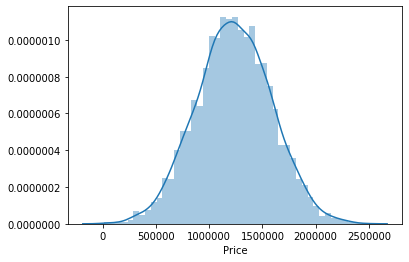

In [8]:
# Realizamos un gráfico histograma de la distribución del precio medio de nuestro dataset:
# Coincide con que la punta de valores se encuentra en el precio medio (es de 1.232073e+06)
sns.distplot(casas['Price'])

### Dividimos los datos

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
# momstramos las columnas
casas.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [11]:
# Eje X = eje de características (todas las columnas menos el precio) que contienen los valores que caracterizan
# Eje Y = variable objetivo (precio), que será la variable que queremos predecir
x = casas[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = casas['Price']

In [12]:
# con el parámetro 'test_size' separamos el porcentaje de datos que van a ir destinados al test
# de 5000 (100%): 70% entrenamiento, 30% tests
# random_state=42 valor que vamos a darle para que coja los valores de entrenamiento de forma aleatoria
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)


In [13]:
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1840,55245.337288,3.965745,8.961106,4.38,43557.943435
2115,62305.638407,6.490769,7.647362,3.19,47066.617420
4437,77345.472379,5.407515,8.243178,3.11,26706.911029
1146,65846.171039,6.385374,6.804131,3.18,28214.363551
2486,69350.793357,6.910415,8.288048,4.29,36779.058567
...,...,...,...,...,...
4426,76223.561256,6.371627,5.342217,2.42,30165.337445
466,56685.014442,6.958045,7.502115,3.38,43322.166854
3092,66195.337714,6.507971,6.611861,3.14,37288.923574
3772,58694.515017,7.394768,9.269453,4.32,49960.977236


In [17]:
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1501,61907.593345,7.017838,6.440256,3.25,43828.947207
2586,57160.202243,6.893260,6.921532,3.13,43467.147035
2653,70190.796445,6.745054,6.662567,2.01,29215.136112
1055,69316.796889,6.300409,7.873576,4.28,24448.211461
705,72991.481649,3.412866,6.494081,2.48,50626.495426
...,...,...,...,...,...
3563,74208.124644,6.259782,8.666717,3.38,25507.336340
1538,71112.350296,5.612677,7.419542,4.26,24134.413996
1837,63665.394418,6.729105,7.732959,3.43,44029.681816
2380,56073.892443,6.576733,6.959056,4.40,64149.680213


### Obtenemos el modelo de entrenamiento 

In [18]:
lrn = LinearRegression()
lrn.fit(x_train, y_train) # entrenamos el modelo!!

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# del 30% de valores restantes, obetenemos las prediciones del precio
predicciones = lrn.predict(x_test)

### Evaluamos el modelo

In [27]:
# comparamos en una tabla los precios predecidos VS precios reales
diccionario = {'precios predecidos':predicciones, 'precios reales':y_test, 'error':y_test-predicciones}
dataframe = pd.DataFrame(diccionario)
dataframe.head(10)

,precios predecidos,precios reales,error
1501,1.308536e+06,1.339096e+06,30559.941319
2586,1.237123e+06,1.251794e+06,14671.451372
2653,1.243836e+06,1.340095e+06,96259.338035
1055,1.229242e+06,1.431508e+06,202265.920788
705,1.059353e+06,1.042374e+06,-16978.994123
106,1.542359e+06,1.555321e+06,12961.788393
589,1.095211e+06,1.250882e+06,155671.675730
2468,8.326763e+05,1.039381e+06,206704.400853
2413,7.889063e+05,8.324752e+05,43568.856786
1600,1.468528e+06,1.420648e+06,-47879.449178


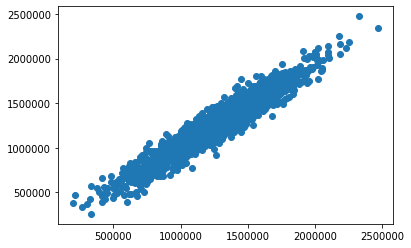

In [34]:
# vamos a ver los valores graficados: al estar todos juntos quiere decir que se ha hecho bien
plt.scatter(y_test,predicciones)

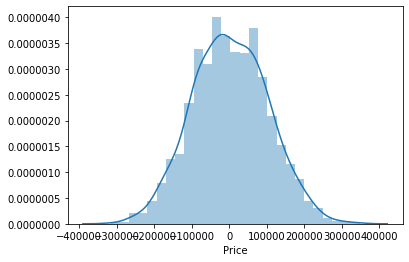

In [35]:
# el diagrama debería tener forma de distribución normal (en forma de capana invertida) para dar por valido el modelo
sns.distplot(y_test-predicciones)